In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [18]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-36.457438781734055 170.1422563629796
16.504730460209373 -157.18913681274014
12.649777019114666 -63.55768006134079
64.9766488606459 23.139286621941096
-72.03123913378748 -18.54394815363335
39.13878303147462 -166.31435433135454
-45.92997042756578 -95.15522632234254
-58.17879654854778 113.18481627320182
-87.99727679815517 18.29947947817942
-74.69053388410468 -81.54098160482188
-26.439588913472193 -104.9859823317396
-9.638521094139392 43.7175814428023
43.72223307111915 95.20298964415798
-5.254396960593468 -56.861266977858264
-66.75934961253141 143.8127351608988
8.386024073045263 -0.8471513415730669
80.1121296776831 1.0484994313553955
-3.1048617940187597 88.104729343006
-72.02950918431726 150.94820972795776
-78.257613542123 47.090002915388
-56.207532317816366 -120.30047455533952
7.597749510038867 -7.867094831862914
-31.103210314676403 -178.47252083480228
37.81301666881467 131.5361740887447
10.661911770913008 33.47183197865661
41.06408511581674 -60.55832233436533
-34.98327262966887 -62.6970

53.37326101761499 -103.63908771027583
4.372638159397226 -97.20058335739009
36.176345418723486 -121.04824046947861
-50.5027765148411 10.052796689629986
-19.96187733467326 95.42222093986106
85.30705005442337 122.02577926068034
-83.87495809854879 177.698936615194
-40.63790770892909 -98.82383852994533
24.19960599192578 -155.43616513693058
-8.381597610189601 81.76295581290344
-67.9623634056504 120.14595330099274
13.61423373395347 -89.73941588796436
-32.57034153404375 -171.05928040796854
-9.369599107932785 -29.74460787862401
37.295661126668236 97.30374199250701
46.485859051548914 177.9704178180624
30.494428202625286 77.16982783093721
-53.417922317391344 -76.87243569510188
9.627716648383554 157.828979355787
8.327651229367135 162.40403967692248
-12.227738105308362 -49.799127641800794
26.872765484153575 102.60632342873635
2.309266275557988 170.51275154052882
9.783214862982561 -97.29274638090381
-26.897079200272728 -132.09890077168882
8.542598459901598 -102.08949066060441
-44.90852090182121 -33.

-23.249630256240664 132.74549119373148
89.2084872904569 23.19345766393201
20.162456033204904 -83.28086519224907
4.080847805193713 122.10876635169325
-59.57305835441165 144.57576157688362
-62.12689827319343 -125.56708329025601
-18.539149240359308 -114.69650749140453
-35.777660272609054 162.50715400571187
89.29950493755288 43.70497912881402
-47.42409493787877 56.786589866271186
80.52370712479117 -163.14140648902008
68.76291114152792 -23.101809788468216
87.37399096452378 -121.92834810387798
0.5531716552155075 18.315267965290047
40.512175426138725 -144.84392136936646
7.730069619120329 -134.66322442108466
20.3281072849842 -129.0985930575682
32.14231700692727 -155.47961732478586
19.029411916181374 -2.295303582913647
62.309020849800845 166.19863211817977
59.60459660511279 -125.40198952579813
63.560398503007036 -42.56740060949838
-73.77491500062997 -51.59841830698531
44.706301969298465 -97.1286542244858
41.02709946967039 139.67745312939462
-87.31937518475898 -138.82383773463485
30.020221577484

In [19]:
!pip install citipy

In [20]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [21]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fab91ea21c030c21341998e0ff6c4c4a


In [23]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [26]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ahipara
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | la asuncion
Processing Record 4 of Set 1 | kokkola
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | mitsamiouli
Processing Record 13 of Set 1 | hami
Processing Record 14 of Set 1 | jacareacanga
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | salaga
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | meulaboh
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | biankouma
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | izumo
Processing Record 24 of Set 1 | asosa
P

Processing Record 39 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | half moon bay
Processing Record 43 of Set 4 | lensk
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | ayan
Processing Record 46 of Set 4 | ust-nera
Processing Record 47 of Set 4 | nchelenge
Processing Record 48 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 49 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 50 of Set 4 | devils lake
Processing Record 1 of Set 5 | huangmei
Processing Record 2 of Set 5 | taveta
Processing Record 3 of Set 5 | bad oldesloe
Processing Record 4 of Set 5 | merauke
Processing Record 5 of Set 5 | vardo
Processing Record 6 of Set 5 | sabha
Processing Record 7 of Set 5 | laguna
Processing Record 8 of Set 5 | sakaiminato
Processing Record 9 of Set 5 | sur
Processing Record 10 of Set 5 | pirovskoye
Processing Reco

City not found. Skipping...
Processing Record 26 of Set 8 | lagos
Processing Record 27 of Set 8 | zyryanka
Processing Record 28 of Set 8 | wilmington
Processing Record 29 of Set 8 | xai-xai
Processing Record 30 of Set 8 | annonay
Processing Record 31 of Set 8 | gorom-gorom
Processing Record 32 of Set 8 | qaqortoq
Processing Record 33 of Set 8 | kuching
Processing Record 34 of Set 8 | coquimbo
Processing Record 35 of Set 8 | kirkwood
Processing Record 36 of Set 8 | catamarca
Processing Record 37 of Set 8 | gumdag
Processing Record 38 of Set 8 | gashua
Processing Record 39 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 40 of Set 8 | el campo
Processing Record 41 of Set 8 | boa vista
Processing Record 42 of Set 8 | sao joao da barra
Processing Record 43 of Set 8 | olga
Processing Record 44 of Set 8 | sheopur
Processing Record 45 of Set 8 | muros
Processing Record 46 of Set 8 | notodden
Processing Record 47 of Set 8 | massaguet
Processing Record 48 of Set 8 | ham

Processing Record 16 of Set 12 | winschoten
Processing Record 17 of Set 12 | linxia
Processing Record 18 of Set 12 | zheshart
Processing Record 19 of Set 12 | hueytown
Processing Record 20 of Set 12 | urucara
Processing Record 21 of Set 12 | great yarmouth
Processing Record 22 of Set 12 | soyo
Processing Record 23 of Set 12 | baykit
Processing Record 24 of Set 12 | mayo
Processing Record 25 of Set 12 | moerai
Processing Record 26 of Set 12 | buenos aires
Processing Record 27 of Set 12 | paamiut
Processing Record 28 of Set 12 | vaitape
Processing Record 29 of Set 12 | christchurch
Processing Record 30 of Set 12 | dukat
Processing Record 31 of Set 12 | maridi
Processing Record 32 of Set 12 | tyshkivka
Processing Record 33 of Set 12 | cooma
Processing Record 34 of Set 12 | kamaishi
Processing Record 35 of Set 12 | sao filipe
Processing Record 36 of Set 12 | akyab
Processing Record 37 of Set 12 | santa fe
Processing Record 38 of Set 12 | latung
Processing Record 39 of Set 12 | port macquar

In [54]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ahipara,-35.1667,173.1667,58.06,61,8,3.11,NZ,2022-07-03 03:44:39
1,Hilo,19.7297,-155.0900,77.61,88,71,1.01,US,2022-07-03 03:54:27
2,La Asuncion,11.0333,-63.8628,87.53,70,49,13.80,VE,2022-07-03 03:54:28
3,Kokkola,63.8385,23.1307,63.93,94,0,10.36,FI,2022-07-03 03:54:28
4,Mar Del Plata,-38.0023,-57.5575,39.94,75,0,2.30,AR,2022-07-03 03:54:29
5,Kapaa,22.0752,-159.3190,78.12,79,100,8.01,US,2022-07-03 03:54:29
6,Castro,-24.7911,-50.0119,56.21,74,6,4.34,BR,2022-07-03 03:54:30
7,Albany,42.6001,-73.9662,66.06,76,71,3.91,US,2022-07-03 03:54:30
8,Bredasdorp,-34.5322,20.0403,50.20,81,8,7.05,ZA,2022-07-03 03:54:30
9,Ushuaia,-54.8000,-68.3000,38.86,75,40,12.66,AR,2022-07-03 03:54:31


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [56]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [57]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1656930885.716864

In [58]:
today = time.strftime("%x")
today

'07/04/22'

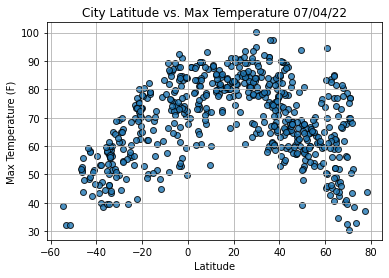

In [59]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

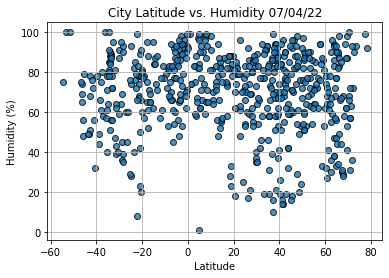

In [60]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

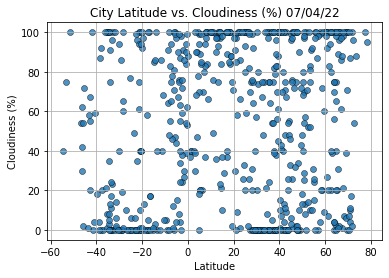

In [61]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=0.5, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

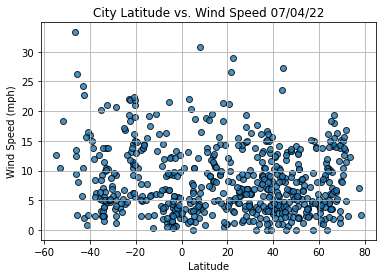

In [62]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()